In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [8]:
## Integración de la Base de datos a usar

lista_1 = pd.read_csv("Gas Natural Agrupado.csv")
lista_1.rename(columns = {"Segmento Natgas":"Segmento", "Año":"Año vehículo"}, inplace=True)
lista_1

,Id_placa,Placa,Segmento,Fecha conversión,Taller conversión,Plaza,mes de primera carga,Fecha de cliente,Modelo,Año vehículo,Fecha de ultima carga,Meses sin consumo,Maximo consumo en su historia,ultimo consumo,Dif_conv_ult_cons,Dif_prim_cons_ult_cons,Clasificación
0,2276,UMT631G,Taxi,2013-04-17 00:00:00,GNCV NATGAS CEC QUERETARO,QUERÉTARO,2019-10-01,NaN,Ninguna,2013,2021-11-01,21,67.30,14.62,3120.000000,762,1
1,2277,3883TGH,Taxi,2014-04-16 00:00:00,GNCV NATGAS CEC QUERETARO,QUERÉTARO,2017-01-01,2017-03-01,Ninguna,2010,2020-12-01,32,599.11,175.26,2421.000000,1430,1
2,2278,2862TGH,Taxi,2014-04-16 00:00:00,GNCV NATGAS CEC QUERETARO,QUERÉTARO,2017-01-01,2017-03-01,Ninguna,2013,2018-03-01,65,845.10,454.61,1415.000000,424,1
3,2280,2956TGH,Taxi,2014-04-16 00:00:00,GNCV NATGAS CEC QUERETARO,QUERÉTARO,2017-01-01,2017-03-01,Ninguna,2013,2019-08-01,48,1058.97,15.13,1933.000000,942,1
4,2281,1134TGH,Taxi,2014-01-21 00:00:00,GNCV NATGAS CEC QUERETARO,QUERÉTARO,2017-01-01,2017-03-01,Ninguna,2012,2020-10-01,34,750.97,328.43,2445.000000,1369,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15018,165668,SYV329A,Plataforma,2022-04-21 17:56:36,Taller VANTECS,MONTERREY,2023-07-01,NaN,Ninguna,2022,2023-08-01,0,84.68,84.68,466.252361,31,0
15019,166130,AECO1004,Taxi,2022-05-11 02:43:28,"GNVTEC, S.A.P.I. de C.V.",MONTERREY,2023-07-01,NaN,Ninguna,2022,2023-08-01,0,498.83,138.88,446.886481,31,0
15020,166732,RNC951B,Mypime,2022-06-09 17:58:48,"CASCO SERVICE CENTER, SA DE CV",MONTERREY,2023-07-01,NaN,Ninguna,2022,2023-07-01,1,14.06,14.06,386.250833,0,0
15021,166858,TBY571A,Mypime,2022-06-14 15:31:39,GNVexpress Vehicular SA - Querétaro,MONTERREY,2023-07-01,NaN,Ninguna,2022,2023-08-01,0,85.51,56.33,412.353021,31,0


In [9]:
lista_clientes = lista_1[["Meses sin consumo", "Clasificación"]]
lista_clientes.drop(["Clasificación"], axis=1, inplace=True)
lista_clientes.columns = ["Categoria"]
lista_clientes.astype(int)
lista_clientes

C:\Users\Usuario\AppData\Local\Temp\ipykernel_1488\1679358881.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lista_clientes.drop(["Clasificación"], axis=1, inplace=True)


,Categoria
0,21
1,32
2,65
3,48
4,34
...,...
15018,0
15019,0
15020,1
15021,0


In [10]:
## Creación de la variable a predecir (Perdido/Recurrente)
lista_clientes.Categoria = ["Perdido" if each >= 12 else "Recurrente" for each in lista_clientes.Categoria]
lista_clientes

C:\Users\Usuario\AppData\Local\Temp\ipykernel_1488\869219446.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lista_clientes.Categoria = ["Perdido" if each >= 12 else "Recurrente" for each in lista_clientes.Categoria]


,Categoria
0,Perdido
1,Perdido
2,Perdido
3,Perdido
4,Perdido
...,...
15018,Recurrente
15019,Recurrente
15020,Recurrente
15021,Recurrente


In [11]:
Lista_final = pd.concat([lista_1, lista_clientes], axis=1, join="inner")
Lista_final

,Id_placa,Placa,Segmento,Fecha conversión,Taller conversión,Plaza,mes de primera carga,Fecha de cliente,Modelo,Año vehículo,Fecha de ultima carga,Meses sin consumo,Maximo consumo en su historia,ultimo consumo,Dif_conv_ult_cons,Dif_prim_cons_ult_cons,Clasificación,Categoria
0,2276,UMT631G,Taxi,2013-04-17 00:00:00,GNCV NATGAS CEC QUERETARO,QUERÉTARO,2019-10-01,NaN,Ninguna,2013,2021-11-01,21,67.30,14.62,3120.000000,762,1,Perdido
1,2277,3883TGH,Taxi,2014-04-16 00:00:00,GNCV NATGAS CEC QUERETARO,QUERÉTARO,2017-01-01,2017-03-01,Ninguna,2010,2020-12-01,32,599.11,175.26,2421.000000,1430,1,Perdido
2,2278,2862TGH,Taxi,2014-04-16 00:00:00,GNCV NATGAS CEC QUERETARO,QUERÉTARO,2017-01-01,2017-03-01,Ninguna,2013,2018-03-01,65,845.10,454.61,1415.000000,424,1,Perdido
3,2280,2956TGH,Taxi,2014-04-16 00:00:00,GNCV NATGAS CEC QUERETARO,QUERÉTARO,2017-01-01,2017-03-01,Ninguna,2013,2019-08-01,48,1058.97,15.13,1933.000000,942,1,Perdido
4,2281,1134TGH,Taxi,2014-01-21 00:00:00,GNCV NATGAS CEC QUERETARO,QUERÉTARO,2017-01-01,2017-03-01,Ninguna,2012,2020-10-01,34,750.97,328.43,2445.000000,1369,1,Perdido
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15018,165668,SYV329A,Plataforma,2022-04-21 17:56:36,Taller VANTECS,MONTERREY,2023-07-01,NaN,Ninguna,2022,2023-08-01,0,84.68,84.68,466.252361,31,0,Recurrente
15019,166130,AECO1004,Taxi,2022-05-11 02:43:28,"GNVTEC, S.A.P.I. de C.V.",MONTERREY,2023-07-01,NaN,Ninguna,2022,2023-08-01,0,498.83,138.88,446.886481,31,0,Recurrente
15020,166732,RNC951B,Mypime,2022-06-09 17:58:48,"CASCO SERVICE CENTER, SA DE CV",MONTERREY,2023-07-01,NaN,Ninguna,2022,2023-07-01,1,14.06,14.06,386.250833,0,0,Recurrente
15021,166858,TBY571A,Mypime,2022-06-14 15:31:39,GNVexpress Vehicular SA - Querétaro,MONTERREY,2023-07-01,NaN,Ninguna,2022,2023-08-01,0,85.51,56.33,412.353021,31,0,Recurrente


In [12]:
## Limpieza de los registros con menos de 60 días de consumo

Lista_final1 = Lista_final.set_index("Segmento")
Lista_final2 = Lista_final1.loc[["Taxi", "Mypime", "Particular", "Plataforma", "Transporte Urbano"]] 
Lista_final2 = Lista_final2.reset_index()
Lista_final2 = Lista_final2[Lista_final2["Dif_prim_cons_ult_cons"] > 50]
Lista_final2

,Segmento,Id_placa,Placa,Fecha conversión,Taller conversión,Plaza,mes de primera carga,Fecha de cliente,Modelo,Año vehículo,Fecha de ultima carga,Meses sin consumo,Maximo consumo en su historia,ultimo consumo,Dif_conv_ult_cons,Dif_prim_cons_ult_cons,Clasificación,Categoria
0,Taxi,2276,UMT631G,2013-04-17 00:00:00,GNCV NATGAS CEC QUERETARO,QUERÉTARO,2019-10-01,NaN,Ninguna,2013,2021-11-01,21,67.30,14.62,3120.000000,762,1,Perdido
1,Taxi,2277,3883TGH,2014-04-16 00:00:00,GNCV NATGAS CEC QUERETARO,QUERÉTARO,2017-01-01,2017-03-01,Ninguna,2010,2020-12-01,32,599.11,175.26,2421.000000,1430,1,Perdido
2,Taxi,2278,2862TGH,2014-04-16 00:00:00,GNCV NATGAS CEC QUERETARO,QUERÉTARO,2017-01-01,2017-03-01,Ninguna,2013,2018-03-01,65,845.10,454.61,1415.000000,424,1,Perdido
3,Taxi,2280,2956TGH,2014-04-16 00:00:00,GNCV NATGAS CEC QUERETARO,QUERÉTARO,2017-01-01,2017-03-01,Ninguna,2013,2019-08-01,48,1058.97,15.13,1933.000000,942,1,Perdido
4,Taxi,2281,1134TGH,2014-01-21 00:00:00,GNCV NATGAS CEC QUERETARO,QUERÉTARO,2017-01-01,2017-03-01,Ninguna,2012,2020-10-01,34,750.97,328.43,2445.000000,1369,1,Perdido
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14729,Transporte Urbano,15410,630243T,2015-02-06 00:00:00,GNCV NATGAS CEC QUERETARO,QUERÉTARO,2017-01-01,2017-03-01,Ninguna,2015,2017-07-01,73,4564.23,164.72,876.000000,181,2,Perdido
14731,Transporte Urbano,23533,GENKING,2016-08-11 17:40:17,GNCV NATGAS CEC QUERETARO,QUERÉTARO,2017-02-01,NaN,Ninguna,2017,2017-10-01,70,1343.56,1292.69,415.263692,242,0,Perdido
14732,Transporte Urbano,161102,U007C112,2021-10-22 19:08:26,ESTACION NATGAS,GUADALAJARA,2021-11-01,2022-01-01,Ninguna,2021,2022-04-01,16,3928.14,1031.90,160.202477,151,2,Perdido
14735,Transporte Urbano,163190,GYM782,2021-12-21 19:07:55,ESTACION NATGAS,QUERÉTARO,2022-03-01,2022-05-01,Ninguna,2015,2022-07-01,13,5233.00,76.89,191.202836,122,2,Perdido


In [13]:
## Etiquetado de variables cualitativas e integración final de la base a utilizar
Lista_previa = Lista_final2[["Segmento", "Plaza", "Año vehículo", "Meses sin consumo", "Maximo consumo en su historia", "ultimo consumo", 
               "Dif_conv_ult_cons", "Dif_prim_cons_ult_cons", "Categoria"]]

Val_lista = Lista_previa.values

# Etiquetado de variables cualitativas
from sklearn import preprocessing

Cod_Seg = preprocessing.LabelEncoder()
Cod_Seg.fit(["Mypime", "Particular", "Plataforma", "Taxi", "Transporte Urbano"])
Val_lista[:,0] = Cod_Seg.transform(Val_lista[:,0])
## 0 = Mypime 1 = Particular / 2 = Plataforma / 3 = Taxi / 4 = Trans. Urb. 

Cod_Plaza = preprocessing.LabelEncoder()
Cod_Plaza.fit(["AGUASCALIENTES", "CELAYA", "GUADALAJARA", "LEÓN", "MONTERREY", "QUERÉTARO", "SAN JUAN DEL RIO", "SAN LUIS POTOSí"]) 
Val_lista[:,1] = Cod_Plaza.transform(Val_lista[:,1])
## 0 = Aguascalientes / 1 = Celaya / 2 = Guadalajara / 3 = León / 4 = Monterrey / 5 = Querétaro / 6 = San juan del Río / 7 = SLP

Datos_clientes_perdidos = pd.DataFrame(Val_lista)
Datos_clientes_perdidos.columns = ["Segmento", "Plaza", "Año vehículo", "Meses sin consumo", "Maximo consumo en su historia", "ultimo consumo", 
               "Dif_conv_ult_cons", "Dif_prim_cons_ult_cons", "Categoria"]
Datos_clientes_perdidos
#Lista_final.to_csv("Clientes Gas Natural.csv", index=False)

,Segmento,Plaza,Año vehículo,Meses sin consumo,Maximo consumo en su historia,ultimo consumo,Dif_conv_ult_cons,Dif_prim_cons_ult_cons,Categoria
0,3,5,2013,21,67.3,14.62,3120.0,762,Perdido
1,3,5,2010,32,599.11,175.26,2421.0,1430,Perdido
2,3,5,2013,65,845.1,454.61,1415.0,424,Perdido
3,3,5,2013,48,1058.97,15.13,1933.0,942,Perdido
4,3,5,2012,34,750.97,328.43,2445.0,1369,Perdido
...,...,...,...,...,...,...,...,...,...
12727,4,5,2015,73,4564.23,164.72,876.0,181,Perdido
12728,4,5,2017,70,1343.56,1292.69,415.263692,242,Perdido
12729,4,2,2021,16,3928.14,1031.9,160.202477,151,Perdido
12730,4,5,2015,13,5233.0,76.89,191.202836,122,Perdido


## Creación de algoritmos de predicción


In [14]:
## Etiquetado de variable Y (0=perdido/1=recurrente)
Datos_clientes_perdidos.Categoria = [0 if each == "Perdido" else 1 for each in Datos_clientes_perdidos.Categoria]
Datos_clientes_perdidos

,Segmento,Plaza,Año vehículo,Meses sin consumo,Maximo consumo en su historia,ultimo consumo,Dif_conv_ult_cons,Dif_prim_cons_ult_cons,Categoria
0,3,5,2013,21,67.3,14.62,3120.0,762,0
1,3,5,2010,32,599.11,175.26,2421.0,1430,0
2,3,5,2013,65,845.1,454.61,1415.0,424,0
3,3,5,2013,48,1058.97,15.13,1933.0,942,0
4,3,5,2012,34,750.97,328.43,2445.0,1369,0
...,...,...,...,...,...,...,...,...,...
12727,4,5,2015,73,4564.23,164.72,876.0,181,0
12728,4,5,2017,70,1343.56,1292.69,415.263692,242,0
12729,4,2,2021,16,3928.14,1031.9,160.202477,151,0
12730,4,5,2015,13,5233.0,76.89,191.202836,122,0


### KNN

In [15]:
# Asignación de grupos de entrenamiento y prueba
x = Datos_clientes_perdidos.drop(["Meses sin consumo", "Categoria"], axis = 1)
y = Datos_clientes_perdidos.Categoria.values

In [16]:
## Normalización de los datos en X
x = (x - np.min(x)) / (np.max(x) - np.min(x))
x

C:\Users\Usuario\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\Usuario\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\Usuario\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


,Segmento,Plaza,Año vehículo,Maximo consumo en su historia,ultimo consumo,Dif_conv_ult_cons,Dif_prim_cons_ult_cons
0,0.75,0.714286,0.955387,0.000617,0.00017,0.034678,0.299915
1,0.75,0.714286,0.953963,0.005854,0.002116,0.027551,0.584898
2,0.75,0.714286,0.955387,0.008277,0.0055,0.017293,0.155717
3,0.75,0.714286,0.955387,0.010383,0.000176,0.022575,0.376706
4,0.75,0.714286,0.954912,0.00735,0.003972,0.027795,0.558874
...,...,...,...,...,...,...,...
12727,1.0,0.714286,0.956336,0.0449,0.001988,0.011797,0.052048
12728,1.0,0.714286,0.957285,0.013185,0.015654,0.007099,0.078072
12729,1.0,0.285714,0.959184,0.038636,0.012494,0.004499,0.039249
12730,1.0,0.714286,0.956336,0.051485,0.000924,0.004815,0.026877


In [17]:
# Bases de entrenamiento y prueba
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=3)

In [18]:
# Método de KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(x_train, y_train)

## Predicción
y_pred = knn.predict(x_test)
print("Score: ", knn.score(x_test, y_test))

Score:  0.930890052356021


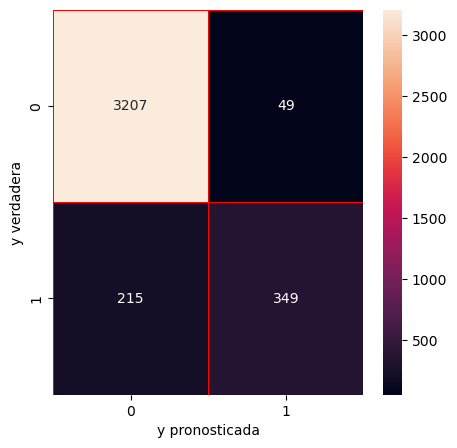

In [19]:
## Creación de matriz de confusión
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred)

f, ax = plt.subplots(figsize= (5,5))

sns.heatmap(cm, annot = True, linewidths = 0.5, linecolor = "red", fmt = ".0f", ax = ax)
plt.xlabel("y pronosticada")
plt.ylabel("y verdadera")
plt.show()

In [20]:
# Estadísticas de desempeño
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      3256
           1       0.88      0.62      0.73       564

    accuracy                           0.93      3820
   macro avg       0.91      0.80      0.84      3820
weighted avg       0.93      0.93      0.93      3820



### SVM

In [21]:
## RBF
from sklearn import svm
clf = svm.SVC(kernel="rbf")
clf.fit(x_train, y_train)

## Predicción para la base de prueba
y_hatRBF = clf.predict(x_test)
y_hatRBF[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

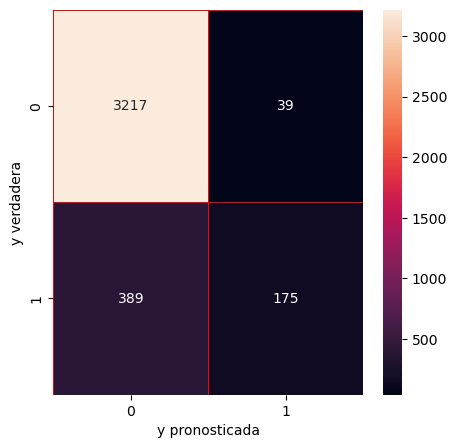

In [22]:
## Matriz de confusión
y_pred = clf.predict(x)
cmRBF = confusion_matrix(y_test, y_hatRBF)

f, ax = plt.subplots(figsize= (5,5))

sns.heatmap(cmRBF, annot = True, linewidths = 0.5, linecolor = "red", fmt = ".0f", ax = ax)
plt.xlabel("y pronosticada")
plt.ylabel("y verdadera")
plt.show()

In [23]:
## Estadísticas de desempeño
from sklearn.metrics import classification_report

cnf_matrix = confusion_matrix(y_test, y_hatRBF, labels=[0,1])
print(classification_report(y_test, y_hatRBF))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      3256
           1       0.82      0.31      0.45       564

    accuracy                           0.89      3820
   macro avg       0.85      0.65      0.69      3820
weighted avg       0.88      0.89      0.87      3820



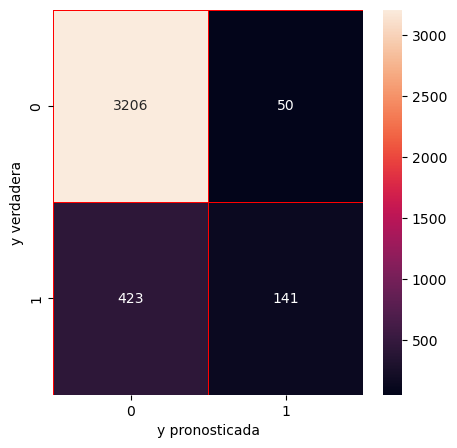

In [24]:
## Linear

clfLin = svm.SVC(kernel="linear")
clfLin.fit(x_train, y_train)

## Predicción para la base de prueba
y_hatLin = clfLin.predict(x_test)

y_predLin = clfLin.predict(x)
cmLin = confusion_matrix(y_test, y_hatLin)

f, ax = plt.subplots(figsize= (5,5))

sns.heatmap(cmLin, annot = True, linewidths = 0.5, linecolor = "red", fmt = ".0f", ax = ax)
plt.xlabel("y pronosticada")
plt.ylabel("y verdadera")
plt.show()

In [25]:
cnf_matrixLin = confusion_matrix(y_test, y_hatLin, labels=[0,1])
print(classification_report(y_test, y_hatLin))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      3256
           1       0.74      0.25      0.37       564

    accuracy                           0.88      3820
   macro avg       0.81      0.62      0.65      3820
weighted avg       0.86      0.88      0.85      3820



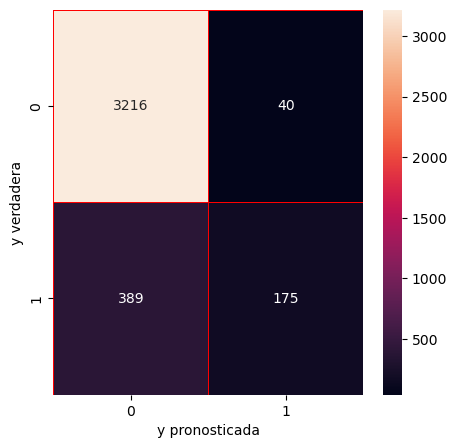

In [26]:
### Polinomial

clfP = svm.SVC(kernel="poly")
clfP.fit(x_train, y_train)

## Predicción para la base de prueba
y_hatP = clfP.predict(x_test)

y_predP = clfP.predict(x)
cmP = confusion_matrix(y_test, y_hatP)

f, ax = plt.subplots(figsize= (5,5))

sns.heatmap(cmP, annot = True, linewidths = 0.5, linecolor = "red", fmt = ".0f", ax = ax)
plt.xlabel("y pronosticada")
plt.ylabel("y verdadera")
plt.show()

In [27]:
cnf_matrixP = confusion_matrix(y_test, y_hatP, labels=[0,1])
print(classification_report(y_test, y_hatP))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94      3256
           1       0.81      0.31      0.45       564

    accuracy                           0.89      3820
   macro avg       0.85      0.65      0.69      3820
weighted avg       0.88      0.89      0.87      3820



### Arbol de decisión

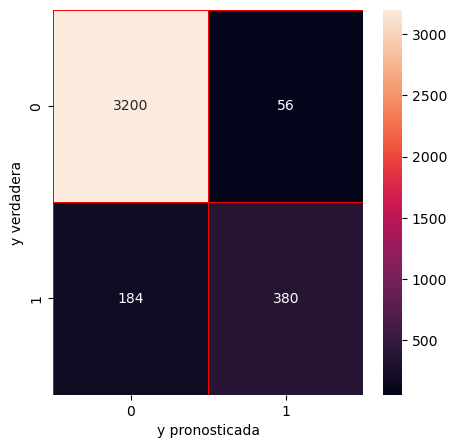

In [28]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

## Crear objeto de clasificación del árbol de decisión
clfAr = DecisionTreeClassifier(criterion = "gini", max_depth = 7) ## Criterio Gini/Entropia
clfAr = clfAr.fit(x_train, y_train)

# Predicción de la respuesta para el grupo de prueba
y_predAr = clfAr.predict(x_test)

# Matriz de confusión
cmAr = confusion_matrix(y_test, y_predAr)

f, ax = plt.subplots(figsize= (5,5))

sns.heatmap(cmAr, annot = True, linewidths = 0.5, linecolor = "red", fmt = ".0f", ax = ax)
plt.xlabel("y pronosticada")
plt.ylabel("y verdadera")
plt.show()

In [29]:
# Estadísticas de desempeño
from sklearn.metrics import classification_report

# Score F1 para grupo de prueba
print("Score F1")
print(clfAr.score(x_test, y_test))
print("--------------------------------------------------------------")
print(classification_report(y_test, y_predAr))

Score F1
0.93717277486911
--------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      3256
           1       0.87      0.67      0.76       564

    accuracy                           0.94      3820
   macro avg       0.91      0.83      0.86      3820
weighted avg       0.93      0.94      0.93      3820



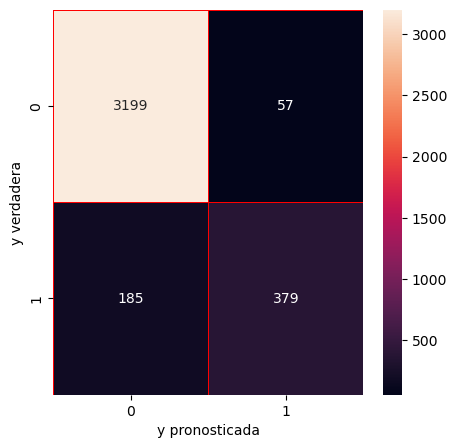

In [30]:
## Crear objeto de clasificación del árbol de decisión
clfArE = DecisionTreeClassifier(criterion = "entropy", max_depth = 7) ## Criterio Gini/Entropia
clfArE = clfArE.fit(x_train, y_train)

# Predicción de la respuesta para el grupo de prueba
y_predArE = clfArE.predict(x_test)

# Matriz de confusión
cmArE = confusion_matrix(y_test, y_predArE)

f, ax = plt.subplots(figsize= (5,5))

sns.heatmap(cmArE, annot = True, linewidths = 0.5, linecolor = "red", fmt = ".0f", ax = ax)
plt.xlabel("y pronosticada")
plt.ylabel("y verdadera")
plt.show()

In [31]:
# Estadísticas de desempeño
from sklearn.metrics import classification_report

print("Score F1")
print(clfArE.score(x_test, y_test))
print(classification_report(y_test, y_predArE))

Score F1
0.9366492146596859
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      3256
           1       0.87      0.67      0.76       564

    accuracy                           0.94      3820
   macro avg       0.91      0.83      0.86      3820
weighted avg       0.93      0.94      0.93      3820



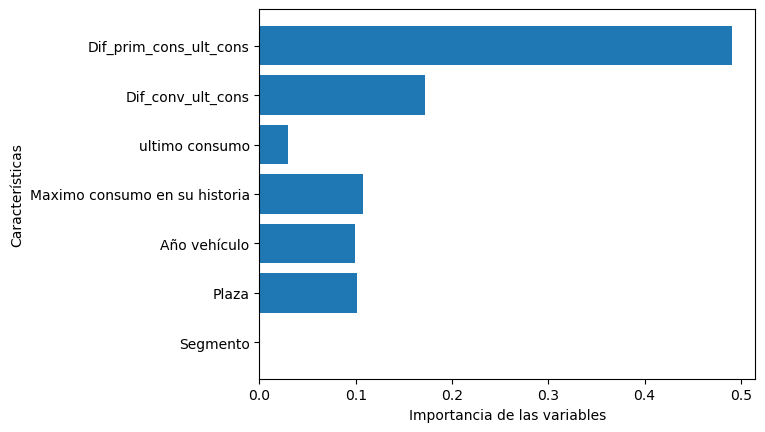

In [32]:
## Importancia de las variables

variables = ["Segmento", "Plaza", "Año vehículo", "Maximo consumo en su historia", "ultimo consumo", 
               "Dif_conv_ult_cons", "Dif_prim_cons_ult_cons"]

def plot_feature_imp(df, model):
    n_features = variables
    plt.barh(n_features, model.feature_importances_, align = "center")
    plt.xlabel("Importancia de las variables")
    plt.ylabel("Características")
    plt.show()
    
plot_feature_imp(Datos_clientes_perdidos, clfAr)

### Random / Gradient / Ada Boost

In [33]:
## Random Forest
from sklearn.ensemble import RandomForestClassifier

## Crear objeto de clasificación
rf = RandomForestClassifier(n_estimators=250, random_state=1, max_depth = 11) 
rf.fit(x_train, y_train)

# Score F1 para grupo de prueba
print("Score F1")
print(rf.score(x_test, y_test))
print("--------------------------------------------------------------")

# Estadísticas de desempeño
from sklearn.metrics import classification_report
y_pred_rf = rf.predict(x_test)

print(classification_report(y_test, y_pred_rf))

Score F1
0.9434554973821989
--------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      3256
           1       0.92      0.68      0.78       564

    accuracy                           0.94      3820
   macro avg       0.93      0.83      0.87      3820
weighted avg       0.94      0.94      0.94      3820



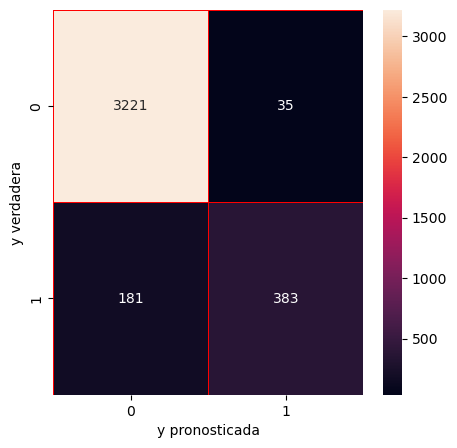

In [34]:
# Matriz de confusión
cmRf = confusion_matrix(y_test, y_pred_rf)

f, ax = plt.subplots(figsize= (5,5))

sns.heatmap(cmRf, annot = True, linewidths = 0.5, linecolor = "red", fmt = ".0f", ax = ax)
plt.xlabel("y pronosticada")
plt.ylabel("y verdadera")
plt.show()

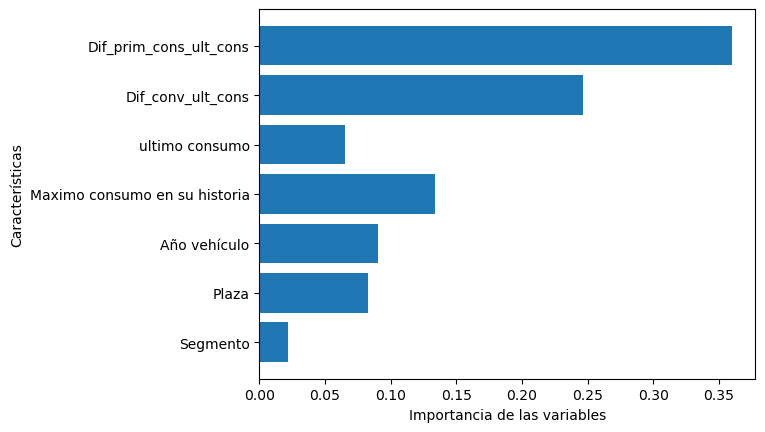

In [35]:
## Importancia de las variables

variables = ["Segmento", "Plaza", "Año vehículo", "Maximo consumo en su historia", "ultimo consumo", 
               "Dif_conv_ult_cons", "Dif_prim_cons_ult_cons"]

def plot_feature_imp(df, model):
    n_features = variables
    plt.barh(n_features, model.feature_importances_, align = "center")
    plt.xlabel("Importancia de las variables")
    plt.ylabel("Características")
    plt.show()
    
plot_feature_imp(Datos_clientes_perdidos, rf)

In [36]:
## Gradient Boosted Tree
from sklearn.ensemble import GradientBoostingClassifier

## Crear objeto de clasificación
gbt = GradientBoostingClassifier(n_estimators=350, random_state=3, max_depth=6) #Profundidad default = 3 niveles
gbt.fit(x_train, y_train)

# Score F1 para grupo de prueba
print(gbt.score(x_test, y_test))
print("--------------------------------------------------------------")

# Estadísticas de desempeño
y_pred_gbt = gbt.predict(x_test)

print(classification_report(y_test, y_pred_gbt))

0.9486910994764398
--------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3256
           1       0.88      0.75      0.81       564

    accuracy                           0.95      3820
   macro avg       0.92      0.87      0.89      3820
weighted avg       0.95      0.95      0.95      3820



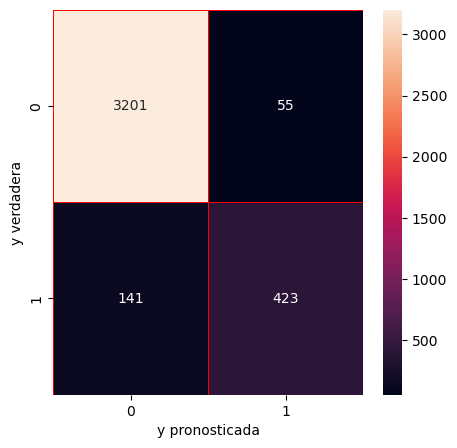

In [37]:
# Matriz de confusión
cmGbt = confusion_matrix(y_test, y_pred_gbt)

f, ax = plt.subplots(figsize= (5,5))

sns.heatmap(cmGbt, annot = True, linewidths = 0.5, linecolor = "red", fmt = ".0f", ax = ax)
plt.xlabel("y pronosticada")
plt.ylabel("y verdadera")
plt.show()

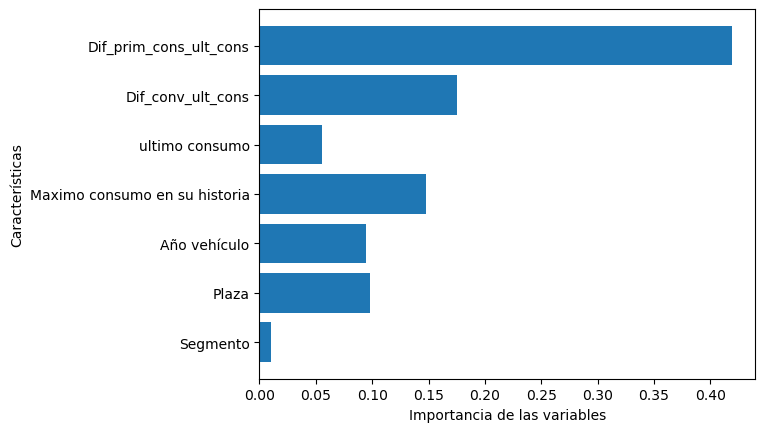

In [38]:
## Importancia de las variables

def plot_feature_imp(df, model):
    n_features = variables
    plt.barh(n_features, model.feature_importances_, align = "center")
    plt.xlabel("Importancia de las variables")
    plt.ylabel("Características")
    plt.show()
    
plot_feature_imp(Datos_clientes_perdidos, gbt)

In [39]:
## Ada Boost
from sklearn.ensemble import AdaBoostClassifier

# AdaBoost usa árboles de decisiónn como clasificador por default
abc = AdaBoostClassifier(n_estimators=150, learning_rate=1)

# Entrenamiento del clasificador
model = abc.fit(x_train, y_train)
y_pred_abc = model.predict(x_test)


# Score F1 para grupo de prueba
print(abc.score(x_test, y_test))
print("--------------------------------------------------------------")
print(classification_report(y_test, y_pred_abc))

0.9369109947643979
--------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      3256
           1       0.85      0.69      0.76       564

    accuracy                           0.94      3820
   macro avg       0.90      0.84      0.86      3820
weighted avg       0.93      0.94      0.93      3820



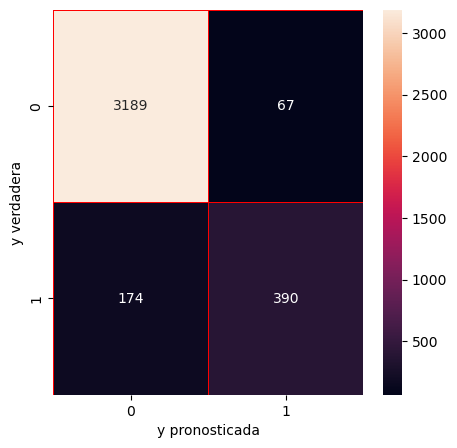

In [40]:
cmAB = confusion_matrix(y_test, y_pred_abc)

f, ax = plt.subplots(figsize= (5,5))

sns.heatmap(cmAB, annot = True, linewidths = 0.5, linecolor = "red", fmt = ".0f", ax = ax)
plt.xlabel("y pronosticada")
plt.ylabel("y verdadera")
plt.show()

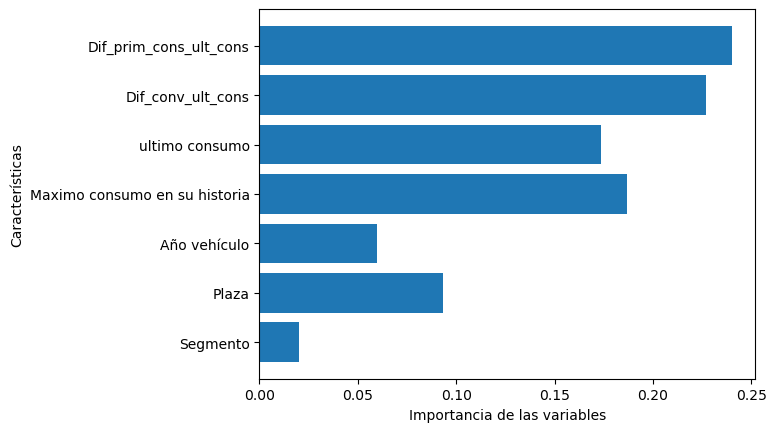

In [41]:
## Importancia de las variables

def plot_feature_imp(df, model):
    n_features = variables
    plt.barh(n_features, model.feature_importances_, align = "center")
    plt.xlabel("Importancia de las variables")
    plt.ylabel("Características")
    plt.show()
    
plot_feature_imp(Datos_clientes_perdidos, abc)

In [42]:
#Datos_clientes_perdidos.to_csv("Clientes Gas pred.csv", index=False)